In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [ ]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
from pandas import ExcelWriter
from math import sqrt
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

In [ ]:
## Setting plotting configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.context('seaborn-talk')
plt.style.use(['tableau-colorblind10'])
#plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

In [ ]:

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [ ]:
from google.colab import files
files.upload()

Saving IMDB Dataset - IMDB Dataset.csv to IMDB Dataset - IMDB Dataset (1).csv


In [ ]:
raw_reviews_df=pd.read_csv('IMDB Dataset - IMDB Dataset.csv')
print(raw_reviews_df.columns)#read from csv file

Index(['id', 'review', 'sentiment'], dtype='object')


In [ ]:
raw_reviews_df.shape

(50000, 3)

In [ ]:
raw_reviews_df.iloc[0:1]

,id,review,sentiment
0,1,One of the other reviewers has mentioned that ...,1


In [ ]:
raw_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50000 non-null  int64 
 1   review     50000 non-null  object
 2   sentiment  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


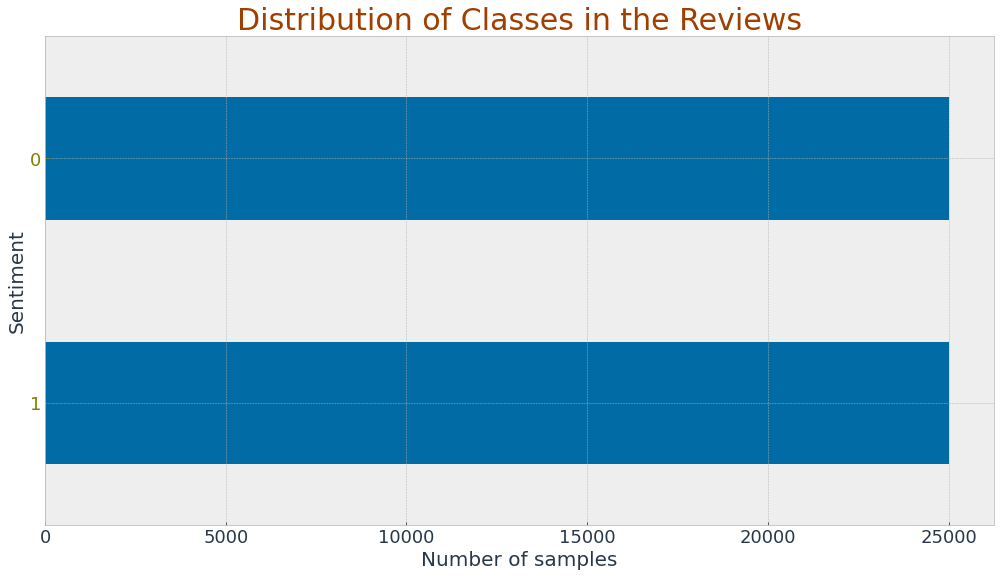

In [ ]:
plt.figure(figsize = (17,9))
raw_reviews_df["sentiment"].value_counts().plot(kind = 'barh')
plt.title("Distribution of Classes in the Reviews")
plt.ylabel("Sentiment")
plt.xlabel("Number of samples")
plt.show();

In [ ]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  0
Total Samples for Negative Sentiments:  0


In [ ]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

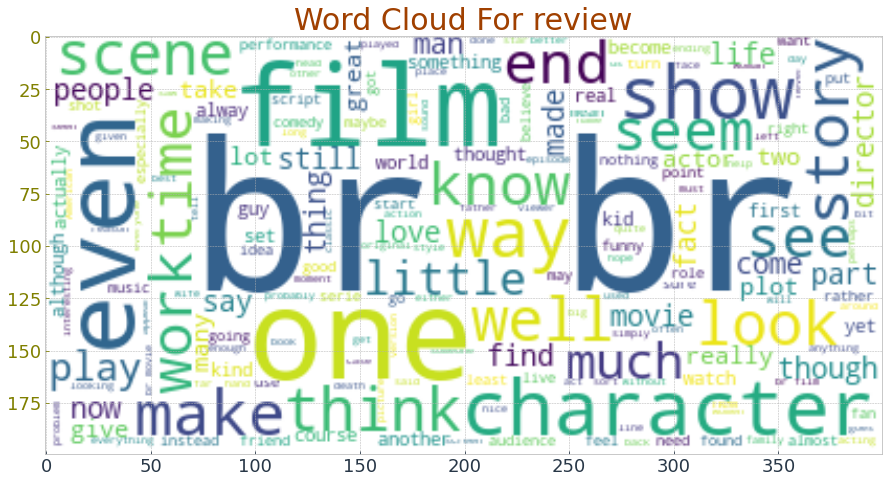

Total Time Taken: 59534.618854522705 ms


In [ ]:
import time
tic= time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="white")
toc = time.time()
diff = 1000*(toc - tic)
print("Total Time Taken: " + str(diff) + " ms")

Text Pre-processing

In [ ]:
from nltk.corpus import stopwords #for stopwords
from nltk.stem import PorterStemmer #for word stemming
from nltk.tokenize import TweetTokenizer #for toekinizing string to list of words
import string #for punctuation
import re #for regular expression
import numpy as np

In [ ]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    text = re.sub(r"https:\/\/.*[\r\n]*","",text)
    
    #remove any urls starting from www. in the text
    text = re.sub(r"www\.\w*\.\w\w\w","",text)
    
    #remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>","",text)
    
    #remove prediods  marks
    text = re.sub(r"[\.]*","",text)
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(text)

    #intizlize porter stemmer
    porter_stemmer = PorterStemmer()
    
    #get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # a list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and #remove stopwords
            (word not in string.punctuation)): #remove punctuation marks
                
                stemmed_word = porter_stemmer.stem(word) #get stem of the current word
                cleaned_text_tokens.append(stemmed_word) #appened stemmed word to list of cleaned list
    
    #combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text


In [ ]:
raw_reviews_df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
process_string(raw_reviews_df["review"].iloc[0])

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

In [ ]:
raw_reviews_df["review"] = raw_reviews_df["review"].apply(process_string)

In [ ]:
#save processed reviews for future use
#save file to csv
raw_reviews_df.to_csv("imdb_reviews_cleaned.csv")


In [ ]:
raw_reviews_df = pd.read_csv("imdb_reviews_cleaned.csv")

In [ ]:
raw_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   id          50000 non-null  int64 
 2   review      50000 non-null  object
 3   sentiment   50000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
raw_reviews_df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

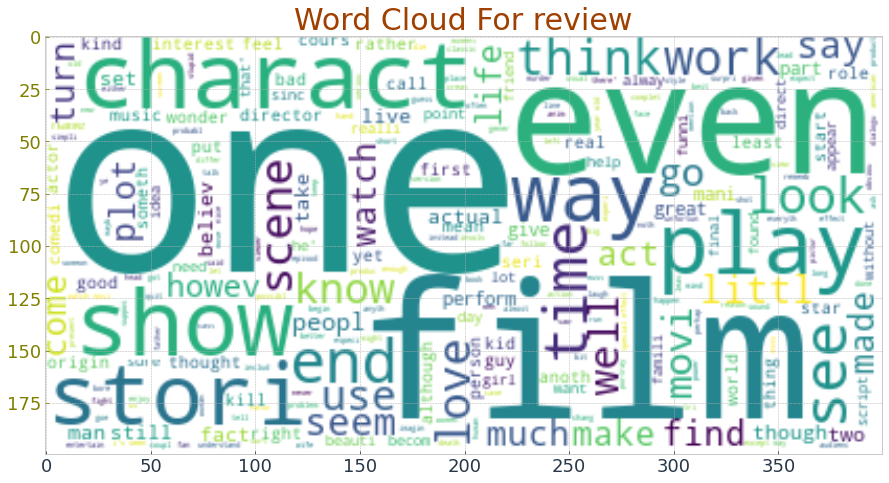

Total Time Taken: 48.76913571357727 ms


In [ ]:
tic = time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="white")
toc = time.time()
diff = toc - tic
print("Total Time Taken: " + str(diff) + " ms")


Split Data into Train and Test Data


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
review_train, review_test, labels_train, labels_test = train_test_split(raw_reviews_df["review"], raw_reviews_df["sentiment"], test_size=0.1, random_state=0)

In [ ]:
review_train, review_valid, labels_train, labels_valid = train_test_split(review_train, labels_train, test_size=0.1111, random_state=0)

In [ ]:
print("Train Set: ")
print("Positive Samples count: " + str(len(review_train[labels_train=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_train[labels_train=="negative"] )  ) )
print("Total Samples count: " + str(len(review_train)  ) )

Train Set: 
Positive Samples count: 0
Negative Samples count: 0
Total Samples count: 40000


In [ ]:
print("Valid Set: ")
print("Positive Samples count: " + str(len(review_valid[labels_valid=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_valid[labels_valid=="negative"] )  ) )
print("Total Samples count: " + str(len(review_valid)  ) )

Valid Set: 
Positive Samples count: 0
Negative Samples count: 0
Total Samples count: 5000


In [ ]:
print("Test Set: ")
print("Positive Samples count: " + str(len(review_test[labels_test =="positive"] )  ) )
print("Negative Samples count: " + str(len(review_test[labels_test =="negative"] )  ) )
print("Total Samples count: " + str(len(review_test) ))

Test Set: 
Positive Samples count: 0
Negative Samples count: 0
Total Samples count: 5000


In [ ]:
review_train_df = pd.DataFrame()
review_train_df["review"] = review_train
review_train_df["sentiment"] = labels_train
review_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13902 to 2487
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [ ]:
review_valid_df = pd.DataFrame()
review_valid_df["review"] = review_valid
review_valid_df["sentiment"] = labels_valid
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.2+ KB


In [ ]:
review_test_df = pd.DataFrame()
review_test_df["review"] = review_test
review_test_df["sentiment"] = labels_test
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.2+ KB


In [ ]:
review_train_df["review"] = review_train_df["review"].apply(lambda row_text: str(row_text))
review_valid_df["review"] = review_valid_df["review"].apply(lambda row_text: str(row_text))
review_test_df["review"] = review_test_df["review"].apply(lambda row_text: str(row_text))

Generate Features from reviews And Numerical labels for Sentiment

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
feature_matrix_train = vectorizer.fit_transform(review_train_df["review"].tolist())

In [ ]:
feature_matrix_train.shape

(40000, 118476)

In [ ]:
feature_matrix_valid = vectorizer.transform(review_valid_df["review"].tolist())

In [ ]:
feature_matrix_valid.shape

(5000, 118476)

In [ ]:
feature_matrix_test = vectorizer.transform(review_test_df["review"].tolist())

In [ ]:
feature_matrix_test.shape

(5000, 118476)

In [ ]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding
label_encoder = preprocessing.LabelEncoder() #instantiate label encoder

In [ ]:
label_matrix_train = label_encoder.fit_transform(review_train_df["sentiment"]) #encoded

In [ ]:
label_matrix_train.shape

(40000,)

In [ ]:
label_matrix_valid = label_encoder.fit_transform(review_valid_df["sentiment"]) #encoded

In [ ]:
label_matrix_valid.shape

(5000,)

In [ ]:
label_matrix_test = label_encoder.fit_transform(review_test_df["sentiment"]) #encoded

In [ ]:
label_matrix_test.shape

(5000,)

In [ ]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from matplotlib import pyplot as plt
import time

def plot_top_words(document_term_df,upper_threshold=10000,lower_threshold=10,count=20):
    
    #for time purposes
    tic = time.time()
    
    top_word_freq = {}
    #build frequency dictionary
    for col in document_term_df.columns:
        
        col_count = document_term_df[col].to_numpy().max()
        
        if lower_threshold < col_count < upper_threshold:
            top_word_freq[col] = col_count
            if len(top_word_freq) > count:
              break

    #print thresholds
    print("Upper Limit: " + str(upper_threshold))
    print("Lower Limit: " + str(lower_threshold))
    print("Requested Count: " + str(count))
    
    plt.figure(figsize=(20,10))
    
    y_vals = [top_word_freq[word] for word in top_word_freq.keys()]
    
    anotates = list(top_word_freq.keys())
    
    x_vals = [i for i in range(0,len(y_vals))]
    plt.scatter(x_vals,y_vals)

    plt.title("Top Word Counts")
    plt.xlabel("Top Words")
    plt.ylabel("Word Frequency")
    
    for y,a,x in zip(y_vals,anotates,x_vals):
        plt.annotate(a, #anotate
                     (x,y), #for this data point 
                    textcoords="offset points", #how to position text
                    xytext=(0,10), #distance from text to points (x,y)
                    ha="center") #horizontal alignment can beleft, right or center 
    
    #for time purposes
    toc = time.time()
    tictoc = (toc-tic)*1000
    print("Time Taken: " + str(tictoc) + " ms")

Upper Limit: 10000
Lower Limit: 20
Requested Count: 20
Time Taken: 15030.554056167603 ms


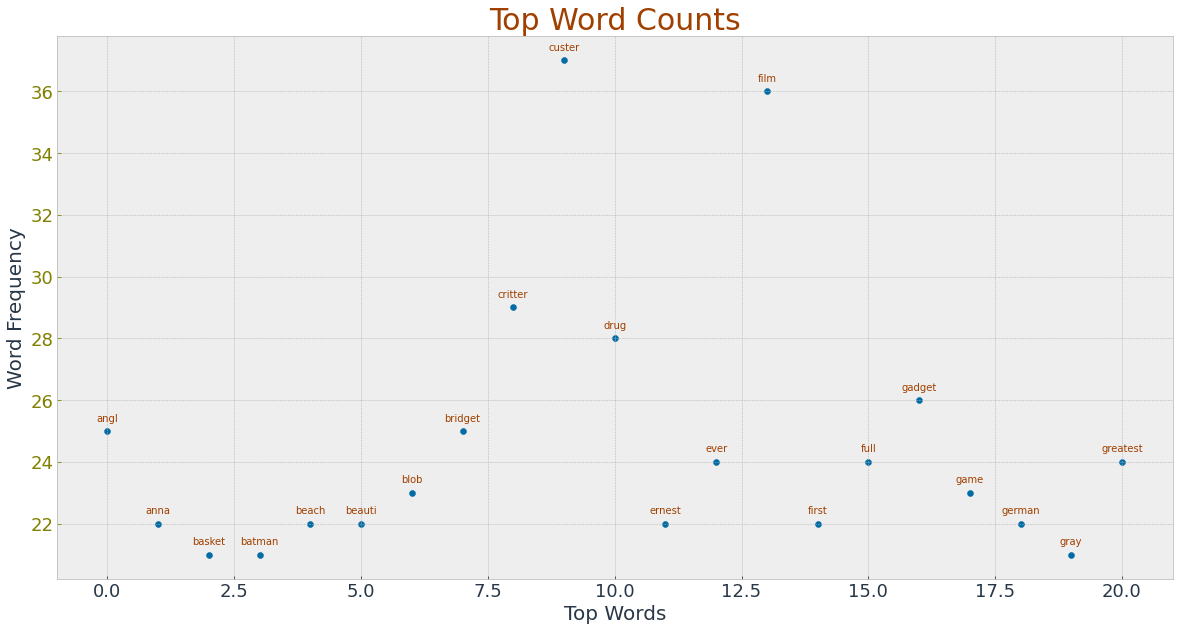

In [ ]:
plot_top_words(dt_train_df,upper_threshold=10000,lower_threshold=20,count=20)

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 1285.900592803955 ms


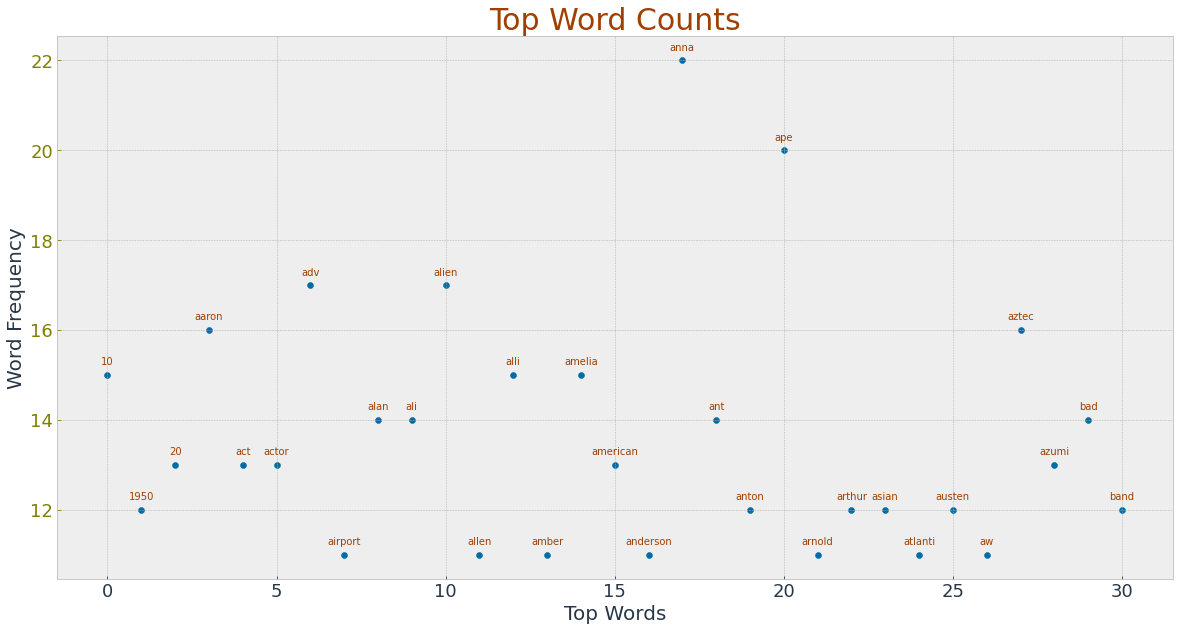

In [ ]:
plot_top_words(dt_train_df[label_matrix_train==0],upper_threshold=10000,lower_threshold=10,count=30)

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 854.7224998474121 ms


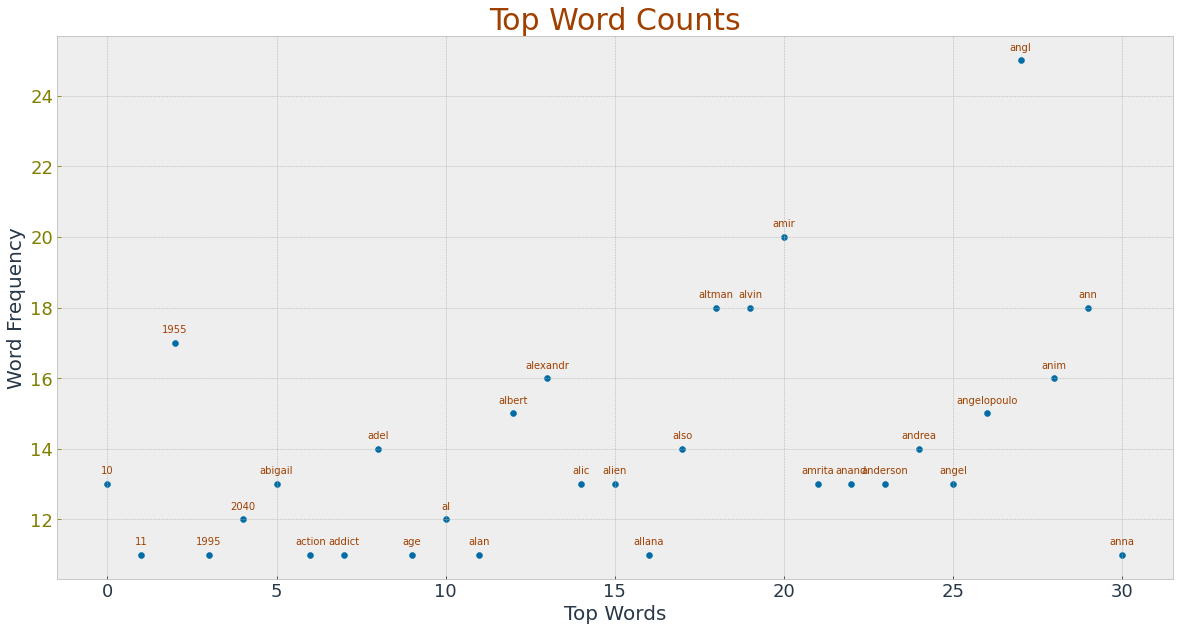

In [ ]:
plot_top_words(dt_train_df[label_matrix_train==1],upper_threshold=10000,lower_threshold=10,count=30)

Re-weighing the document term matrix using TF-IDF Scheme

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
feature_matrix_train = tfidf_vectorizer.fit_transform(review_train_df["review"].tolist())

In [ ]:
feature_matrix_train.shape

(40000, 118476)

In [ ]:
feature_matrix_valid = tfidf_vectorizer.transform(review_valid_df["review"].tolist())

In [ ]:
feature_matrix_valid.shape

(5000, 118476)

In [ ]:
feature_matrix_test = tfidf_vectorizer.transform(review_test_df["review"].tolist())

In [ ]:
feature_matrix_test.shape

(5000, 118476)

In [ ]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Train and Test using AdaBoost

In [ ]:
tic = time.time()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
estimators = 100
model_abc = AdaBoostClassifier(n_estimators=estimators) #The number of trees in the forest
model_abc.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()

In [ ]:
y_pred_stacked = model_abc.predict(feature_matrix_valid)

In [ ]:
accuracy_train_set = model_abc.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set

In [ ]:
accuracy_valid_set = model_abc.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set

In [ ]:
print("Ada Boost CLassifier ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Ada Boost CLassifier ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Ada Boost CLassifier ML Model, Accuracy (Train Set) :  0.83795
Ada Boost CLassifier ML Model, Accuracy (Valid Set) :  0.827
Time Taken: 140495.37324905396 ms
